In [26]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import proplot as pplt

In [57]:
sns.set_context('paper')

In [104]:
sns.set_style('darkgrid')

In [10]:
df = pd.read_csv("../data/network_comparison.csv").drop(columns=['Unnamed: 0'])

In [11]:
df['pct_diff'] = df.seg_difference / df.planar_measure

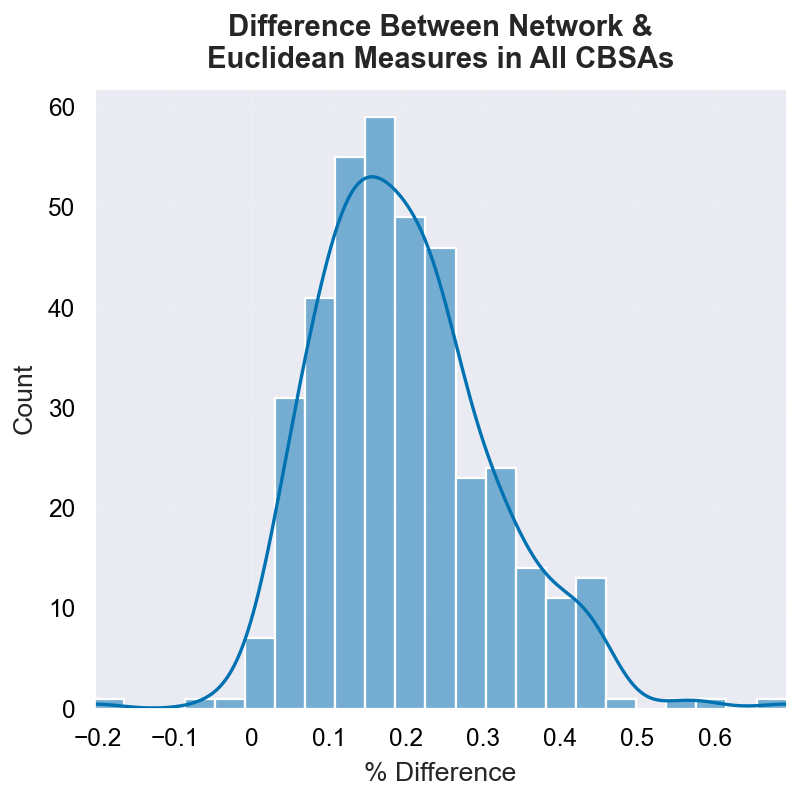

In [105]:
f,ax=pplt.subplots(figsize=(4,4))
sns.histplot(data=df, x="pct_diff", kde=True, ax=ax)

plt.xlabel('% Difference')
plt.ylabel('Count')

plt.suptitle('Difference Between Network &\nEuclidean Measures in All CBSAs')
plt.savefig('../paper/figures/diff_hist.png', dpi=150)

<AxesSubplot:xlabel='pct_diff'>

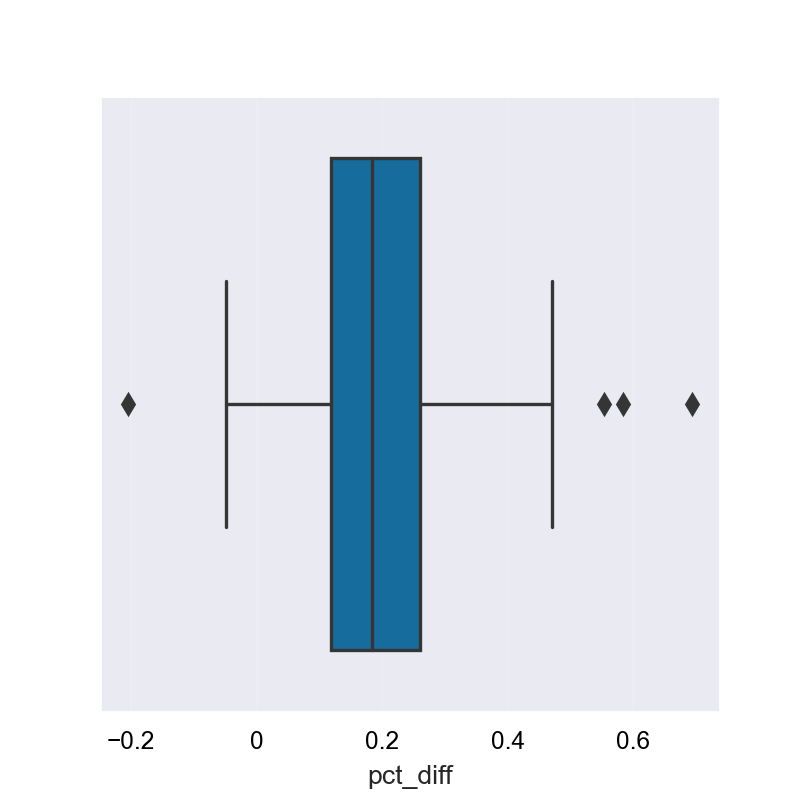

In [87]:
sns.boxplot(data=df, x="pct_diff")

<AxesSubplot:ylabel='Density'>

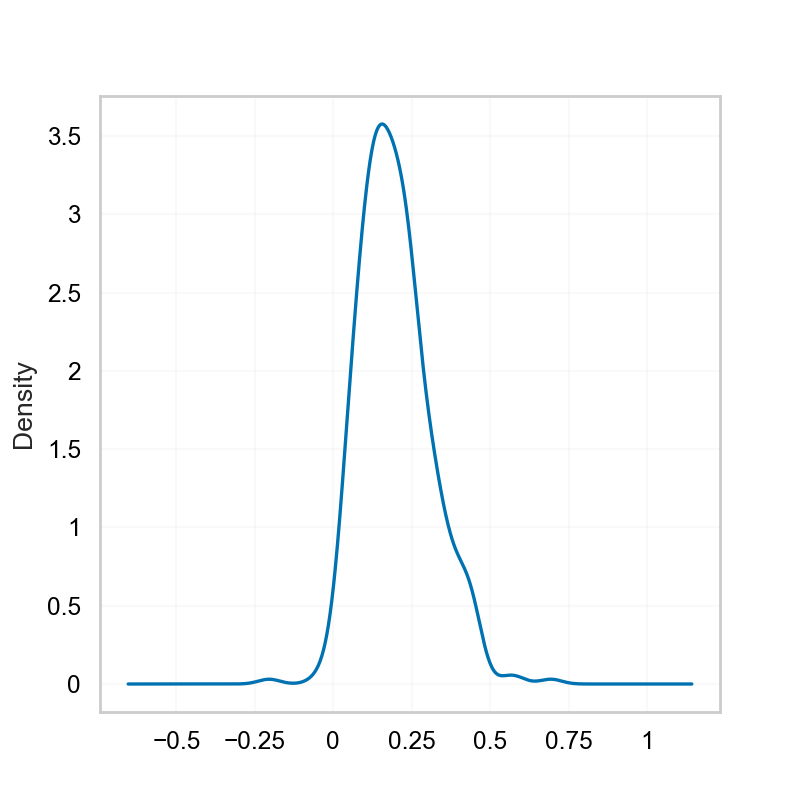

In [97]:
df.pct_diff.plot(kind='density')

In [18]:
save_table?

Signature:
save_table(
    df,
    path=None,
    type='latex',
    landscape=False,
    caption=None,
    ref=None,
    resize=True,
    tabulate_kws=None,
)
Docstring:
Save a pandas dataframe as a markdown table.

Parameters
----------
df : pandas.DataFrame
    dataframe to save
path : str
    path to output file
type : str {'latex', 'pipe'}
    the type of table to output. Can by "pipe" for a markdown table, or "latex" for latex
landscape: bool
    whether to print the table on its own page in landscape orientation
    (useful for wide tables)
caption : str
    the table's caption
ref : str
    short name used to reference the table with pandoc-crossref
resize: bool
    whether the table should be resized to fit on a single page
tabulate_kws : dict
    additional keyword arguments passed to tabulate
File:      ~/Dropbox/projects/seg_networks/seg_networks/util.py
Type:      function


In [44]:
save_table(df.drop(columns=['fips', 'p_value']).describe().round(3),
           path="../paper/tables/difference_descriptives.md",
           type='latex',
           landscape=False,
           resize=False,
           ref='diff_descriptives',
          caption='Descriptive Statistics for Segregation Differences')

In [28]:
# share of metros significant at 1%

np.round(df[df.p_value<0.01].shape[0] / df.shape[0], 3)

0.142

In [27]:
# share of metros significant at 5%

np.round(df[df.p_value<0.05].shape[0] / df.shape[0],3)

0.253

In [17]:
df[df.seg_difference<0]

,fips,name,planar_measure,network_measure,seg_difference,p_value,pct_diff
52,15680,"California-Lexington Park, MD",0.148786,0.147287,-0.001499,0.9700,-0.010074
151,25620,"Hattiesburg, MS",0.258892,0.205958,-0.052934,0.2356,-0.204465
207,30980,"Longview, TX",0.189522,0.180236,-0.009285,0.6396,-0.048993
293,40580,"Rocky Mount, NC",0.281123,0.278974,-0.002148,0.9244,-0.007642


<AxesSubplot:>

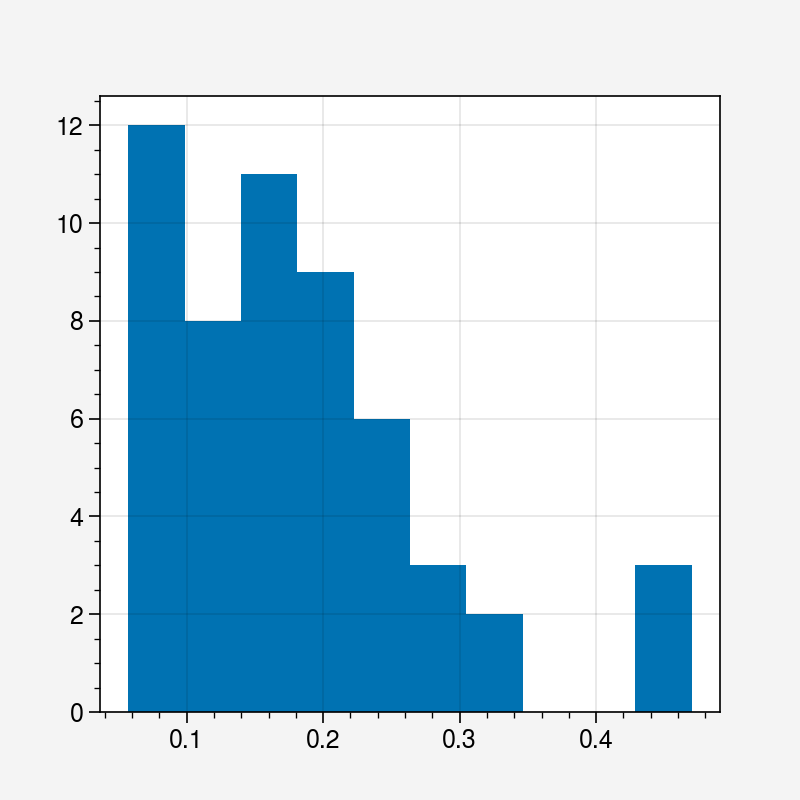

In [32]:
df[df.p_value<0.01].pct_diff.hist()

Are the pct_diff means/varisnces different for the significant places?


In [35]:
df.drop(columns=['fips', 'p_value']).describe().round(3)

,planar_measure,network_measure,seg_difference,pct_diff
count,380.000,380.000,380.000,380.000
mean,0.178,0.207,0.029,0.198
std,0.077,0.078,0.013,0.113
min,0.051,0.070,-0.053,-0.204
25%,0.114,0.141,0.023,0.118
50%,0.172,0.205,0.029,0.184
75%,0.224,0.254,0.036,0.260
max,0.454,0.489,0.077,0.694


In [36]:
# 1%

df[df.p_value<0.01].drop(columns=['fips', 'p_value']).describe().round(3)

,planar_measure,network_measure,seg_difference,pct_diff
count,54.000,54.000,54.000,54.000
mean,0.217,0.251,0.034,0.183
std,0.085,0.088,0.012,0.096
min,0.077,0.112,0.014,0.057
25%,0.154,0.197,0.025,0.107
50%,0.218,0.253,0.032,0.166
75%,0.268,0.314,0.042,0.228
max,0.450,0.489,0.063,0.470


In [37]:
# 5%

df[df.p_value<0.05].drop(columns=['fips', 'p_value']).describe().round(3)

,planar_measure,network_measure,seg_difference,pct_diff
count,96.000,96.000,96.000,96.000
mean,0.198,0.232,0.035,0.207
std,0.081,0.084,0.011,0.104
min,0.060,0.082,0.014,0.057
25%,0.142,0.168,0.027,0.135
50%,0.200,0.231,0.033,0.180
75%,0.249,0.284,0.042,0.261
max,0.450,0.489,0.077,0.554


not really...

which places are in the small ($\alpha=0.01$) subset?

In [47]:
df[df.p_value<0.01].reset_index(drop=True).round(3)

,fips,name,planar_measure,network_measure,seg_difference,p_value,pct_diff
0,11260,"Anchorage, AK",0.092,0.135,0.043,0.002,0.470
1,12060,"Atlanta-Sandy Springs-Alpharetta, GA",0.293,0.321,0.028,0.001,0.095
2,12420,"Austin-Round Rock-Georgetown, TX",0.152,0.174,0.023,0.006,0.150
3,12580,"Baltimore-Columbia-Towson, MD",0.284,0.331,0.047,0.000,0.164
4,14460,"Boston-Cambridge-Newton, MA-NH",0.228,0.254,0.025,0.001,0.111
5,14860,"Bridgeport-Stamford-Norwalk, CT",0.181,0.223,0.042,0.001,0.235
6,16740,"Charlotte-Concord-Gastonia, NC-SC",0.233,0.264,0.032,0.000,0.136
7,16980,"Chicago-Naperville-Elgin, IL-IN-WI",0.365,0.386,0.021,0.000,0.057
8,17140,"Cincinnati, OH-KY-IN",0.262,0.315,0.054,0.000,0.205
9,17460,"Cleveland-Elyria, OH",0.380,0.412,0.033,0.004,0.086


In [73]:
pd.Series([ i[1] for i in df[df.p_value<0.01].name.str.split(',')]).value_counts()

 CA             8
 TX             4
 CT             3
 FL             3
 OH             3
 WA             2
 MI             2
 AK             1
 PA             1
 IL             1
 PA-NJ-DE-MD    1
 AZ             1
 NY             1
 OR-WA          1
 NY-NJ-PA       1
 UT             1
 MA             1
 MO-IL          1
 VA-NC          1
 DC-VA-MD-WV    1
 OK             1
 WI             1
 LA             1
 MN-WI          1
 GA             1
 KY-IN          1
 NV             1
 MO-KS          1
 IN             1
 CO             1
 OH-KY-IN       1
 IL-IN-WI       1
 NC-SC          1
 MA-NH          1
 MD             1
 MA-CT          1
dtype: int64

wow... 8 california metros in the 54 significant at $\alpha=0.01$

In [49]:
save_table(df[df.p_value<0.01].reset_index(drop=True).round(3),
           path="../paper/tables/one_pct_diffs.md",
           type='latex',
           landscape=False,
           resize=True,
           ref='one_pct_diffs',
           caption='CBSAs with Highly Significant Differences in Segregation Measures') 

In [8]:
from seg_networks import save_table

In [66]:
df[['planar_measure', 'network_measure']].corr()

,planar_measure,network_measure
planar_measure,1.000000,0.986882
network_measure,0.986882,1.000000


In [68]:
df[['planar_measure', 'network_measure']].corr('spearman')

,planar_measure,network_measure
planar_measure,1.000000,0.985265
network_measure,0.985265,1.000000


In [67]:
df.sort_values('pct_diff')

,fips,name,planar_measure,network_measure,seg_difference,p_value,pct_diff
151,25620,"Hattiesburg, MS",0.258892,0.205958,-0.052934,0.2356,-0.204465
207,30980,"Longview, TX",0.189522,0.180236,-0.009285,0.6396,-0.048993
52,15680,"California-Lexington Park, MD",0.148786,0.147287,-0.001499,0.9700,-0.010074
293,40580,"Rocky Mount, NC",0.281123,0.278974,-0.002148,0.9244,-0.007642
48,15260,"Brunswick, GA",0.285278,0.286603,0.001325,0.9674,0.004644
...,...,...,...,...,...,...,...
257,36500,"Olympia-Lacey-Tumwater, WA",0.076842,0.111901,0.035060,0.0038,0.456259
11,11260,"Anchorage, AK",0.091620,0.134688,0.043068,0.0024,0.470076
33,13740,"Billings, MT",0.074758,0.116172,0.041414,0.0300,0.553982
236,34060,"Morgantown, WV",0.102569,0.162464,0.059895,0.2088,0.583947


In [106]:
sns.qqplot(df.pct_diff, line='45')

AttributeError: module 'seaborn' has no attribute 'qqplot'

In [108]:
from statsmodels.graphics.gofplots import qqplot

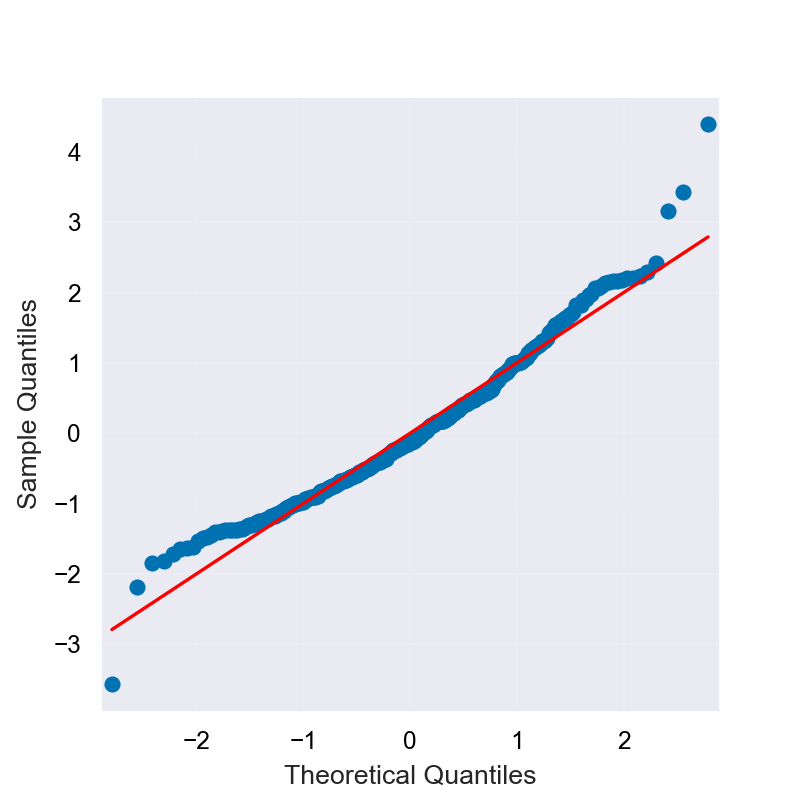

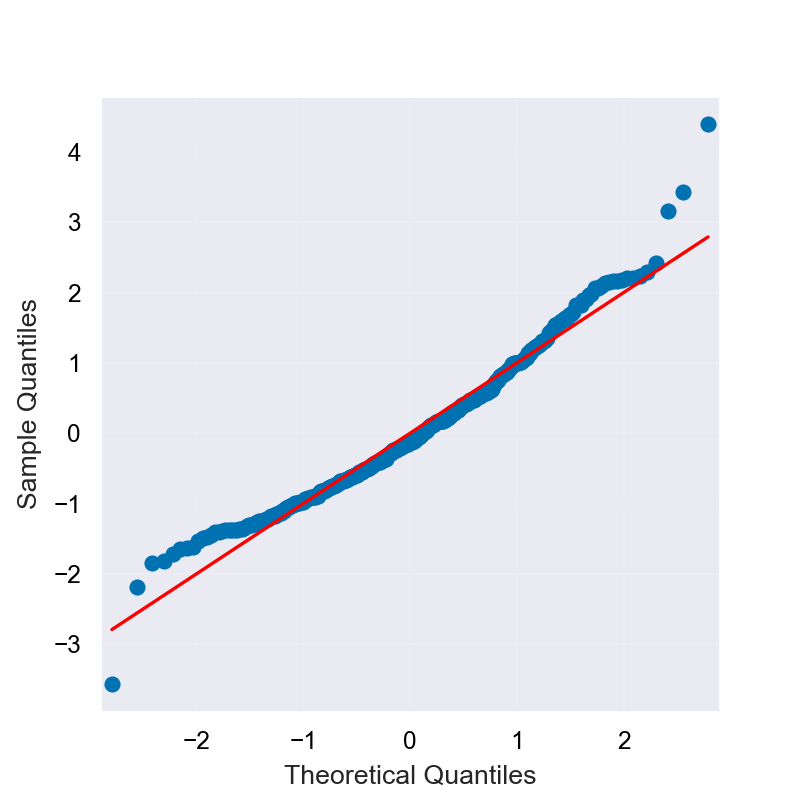

In [112]:
qqplot(df.pct_diff, fit=True, line='s')

In [110]:
qqplot?

Signature:
qqplot(
    data,
    dist=<scipy.stats._continuous_distns.norm_gen object at 0x17e7dc580>,
    distargs=(),
    a=0,
    loc=0,
    scale=1,
    fit=False,
    line=None,
    ax=None,
    **plotkwargs,
)
Docstring:
Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.

Can take arguments specifying the parameters for dist or fit them
automatically. (See fit under Parameters.)

Parameters
----------
data : array_like
    A 1d data array.
dist : callable
    Comparison distribution. The default is
    scipy.stats.distributions.norm (a standard normal).
distargs : tuple
    A tuple of arguments passed to dist to specify it fully
    so dist.ppf may be called.
a : float
    Offset for the plotting position of an expected order statistic, for
    example. The plotting positions are given by (i - a)/(nobs - 2*a + 1)
    for i in range(0,nobs+1)
loc : float
    Location parameter for dist
scale : float
    Scale parameter for dist
fit : bool
    If fit is fals